In [1]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Resources/Datasets/General_factor_data/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv', skiprows=4)
df

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,Apr 2022,4.213
1,Mar 2022,4.322
2,Feb 2022,3.611
3,Jan 2022,3.413
4,Dec 2021,3.406
...,...,...
344,Aug 1993,1.062
345,Jul 1993,1.078
346,Jun 1993,1.097
347,May 1993,1.100


In [3]:
df = df.rename(columns={'Month':'Date',
    'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon':'All_grade_price($/gallon)'})



In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,All_grade_price($/gallon)
0,2022-04-01,4.213
1,2022-03-01,4.322
2,2022-02-01,3.611
3,2022-01-01,3.413
4,2021-12-01,3.406
...,...,...
344,1993-08-01,1.062
345,1993-07-01,1.078
346,1993-06-01,1.097
347,1993-05-01,1.100


In [13]:
df = df[(df.Date >= '2001-01-01')]
df

,Date,All_grade_price($/gallon)
0,2022-04-01,4.213
1,2022-03-01,4.322
2,2022-02-01,3.611
3,2022-01-01,3.413
4,2021-12-01,3.406
...,...,...
251,2001-05-01,1.738
252,2001-04-01,1.591
253,2001-03-01,1.450
254,2001-02-01,1.490


Text(0.5, 1.0, 'Time Series of All_grade_Price')

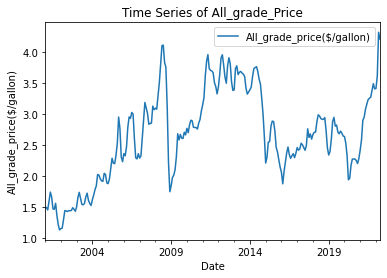

In [53]:
#plot to see data relationship
df.plot('Date','All_grade_price($/gallon)')
plt.ylabel('All_grade_price($/gallon)')
plt.title('Time Series of All_grade_Price')

In [17]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['All_grade_price($/gallon)'], autolag = 'AIC')

print('ADF: ', dftest[0])
print('p-value: ', dftest[1])
print('Number of Lags: ', dftest[2])
#check the data if it is stationarity, the p-value is greater than 0.05, 
#thus,the data is not stationary.

ADF:  -2.2152053532411338
p-value:  0.2007731482616812
Number of Lags:  2


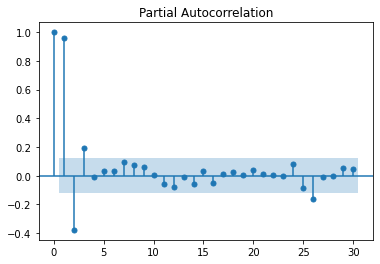

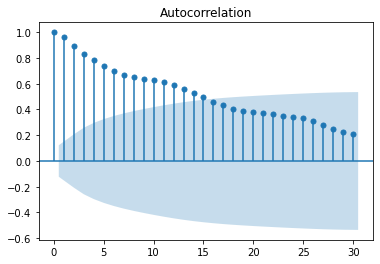

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf = plot_pacf(df['All_grade_price($/gallon)'], lags=30)
                  
acf = plot_acf(df['All_grade_price($/gallon)'], lags=30)                 

In [30]:
#create train/test datasets
X = df['All_grade_price($/gallon)']
train_data = X[:len(X)-30]
test_data = X[len(X)-30:]

In [31]:
train_data.shape

(226,)

In [32]:
test_data.shape

(30,)

In [45]:
# train autoregression
model = AutoReg(train_data, lags=30)
results = model.fit()
print(results.summary())
#print(len(train_data))

                                AutoReg Model Results                                
Dep. Variable:     All_grade_price($/gallon)   No. Observations:                  226
Model:                           AutoReg(30)   Log Likelihood                 113.734
Method:                      Conditional MLE   S.D. of innovations              0.135
Date:                       Tue, 31 May 2022   AIC                             -3.672
Time:                               14:45:53   BIC                             -3.137
Sample:                                   30   HQIC                            -3.455
                                         226                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                         0.0763      0.075      1.023      0.306      -0.070       0.222
All_grade_price($/

C:\Users\Phoeb\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [46]:
#Make a prediction
pred = results.predict(start=len(train_data), end=(len(X)-1), dynamic=False)
print(pred)

226    1.481716
227    1.446681
228    1.502094
229    1.609949
230    1.670323
231    1.695033
232    1.714654
233    1.756994
234    1.854920
235    1.908136
236    1.903096
237    1.900944
238    1.893307
239    1.939878
240    1.979780
241    1.969758
242    1.956827
243    1.975507
244    2.015367
245    2.082817
246    2.129465
247    2.178422
248    2.236714
249    2.261567
250    2.259731
251    2.250596
252    2.240138
253    2.260895
254    2.304934
255    2.347039
dtype: float64


<AxesSubplot:>

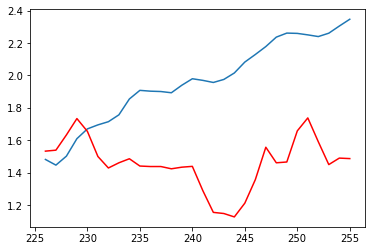

In [47]:
pred.plot()
test_data.plot(color='red')


In [48]:
import sklearn.metrics as skm
print('MAE =', round(skm.mean_absolute_error(test_data, pred), 2))
print("MSE =", round(skm.mean_squared_error(test_data, pred), 2)) 
print("MAE =", round(skm.median_absolute_error(test_data, pred), 2)) 
print("EVS =", round(skm.explained_variance_score(test_data, pred), 2)) 
print("R2 score =", round(skm.r2_score(test_data, pred), 2))

MAE = 0.53
MSE = 0.35
MAE = 0.53
EVS = -3.25
R2 score = -13.77


In [49]:
rmse = sqrt(mean_squared_error(test_data, pred))
print('rmse: ', rmse)

rmse:  0.5907181086019812


In [50]:
#make future predictions, the comming 7days
pred_future = results.predict(start=(len(X)+1), end=(len(X)+30), dynamic=False)
print('The future prediction for the next week')
print(pred_future)
print('Number of prediction make: \t', len(pred_future))

The future prediction for the next week
257    2.378232
258    2.382590
259    2.408717
260    2.428388
261    2.435072
262    2.429593
263    2.418236
264    2.426645
265    2.449205
266    2.462360
267    2.468428
268    2.470765
269    2.485224
270    2.514055
271    2.533441
272    2.540137
273    2.541435
274    2.535472
275    2.529408
276    2.522902
277    2.516391
278    2.518433
279    2.529175
280    2.546846
281    2.564528
282    2.569196
283    2.567026
284    2.568130
285    2.570969
286    2.573805
dtype: float64
Number of prediction make: 	 30
